In [11]:
from n2v.models import N2VConfig, N2V
import numpy as np
from csbdeep.utils import plot_history
from n2v.utils.n2v_utils import manipulate_val_data
from n2v.internals.N2V_DataGenerator import N2V_DataGenerator
from matplotlib import pyplot as plt
import urllib
import os

In [12]:
datagen = N2V_DataGenerator()
image = datagen.load_imgs_from_directory(directory="domes/", filter='*processed.tif', dims='ZYX')
print(image[0].shape)

(1, 320, 796, 796, 1)


In [13]:
patch_shape = (32, 64, 64)
patches = datagen.generate_patches_from_list(image[:1], shape=patch_shape)

Generated patches: (11520, 32, 64, 64, 1)


In [14]:
# We have generated 11520 patches
X = patches[:10368]
X_val = patches[10368:]

In [15]:
# You can increase "train_steps_per_epoch" to get even better results at the price of longer computation. 
config = N2VConfig(X, unet_kern_size=3, 
                   train_steps_per_epoch=int(X.shape[0]/128),train_epochs=20, train_loss='mse', batch_norm=True, 
                   train_batch_size=4, n2v_perc_pix=0.198, n2v_patch_shape=(32, 64, 64), 
                   n2v_manipulator='uniform_withCP', n2v_neighborhood_radius=5)

# Let's look at the parameters stored in the config-object.
vars(config)

{'means': ['32.294025'],
 'stds': ['32.808567'],
 'n_dim': 3,
 'axes': 'ZYXC',
 'n_channel_in': 1,
 'n_channel_out': 1,
 'unet_residual': False,
 'unet_n_depth': 2,
 'unet_kern_size': 3,
 'unet_n_first': 32,
 'unet_last_activation': 'linear',
 'unet_input_shape': (None, None, None, 1),
 'train_loss': 'mse',
 'train_epochs': 20,
 'train_steps_per_epoch': 81,
 'train_learning_rate': 0.0004,
 'train_batch_size': 4,
 'train_tensorboard': True,
 'train_checkpoint': 'weights_best.h5',
 'train_reduce_lr': {'factor': 0.5, 'patience': 10},
 'batch_norm': True,
 'n2v_perc_pix': 0.198,
 'n2v_patch_shape': (32, 64, 64),
 'n2v_manipulator': 'uniform_withCP',
 'n2v_neighborhood_radius': 5,
 'single_net_per_channel': True,
 'blurpool': False,
 'skip_skipone': False,
 'structN2Vmask': None,
 'probabilistic': False}

In [16]:
# a name used to identify the model
model_name = 'dome103_3d'
# the base directory in which our model will live
basedir = 'n2v_models'
# We are now creating our network model.
model = N2V(config=config, name=model_name, basedir=basedir)

d:\Python_vscode\venv_tf\Lib\site-packages\n2v\models\n2v_standard.py:429: UserWarning: output path for model already exists, files may be overwritten: D:\Python_vscode\n2v_models\dome103_3d
  warnings.warn(


In [17]:
history = model.train(X, X_val)

259 blind-spots will be generated per training patch of size (32, 64, 64).


Preparing validation data: 100%|██████████| 1152/1152 [00:00<00:00, 1399.13it/s]


Epoch 1/20
78/81 [===========================>..] - ETA: 1:18 - loss: 1.0037 - n2v_mse: 1.0037 - n2v_abs: 0.5097

['loss', 'lr', 'n2v_abs', 'n2v_mse', 'val_loss', 'val_n2v_abs', 'val_n2v_mse']


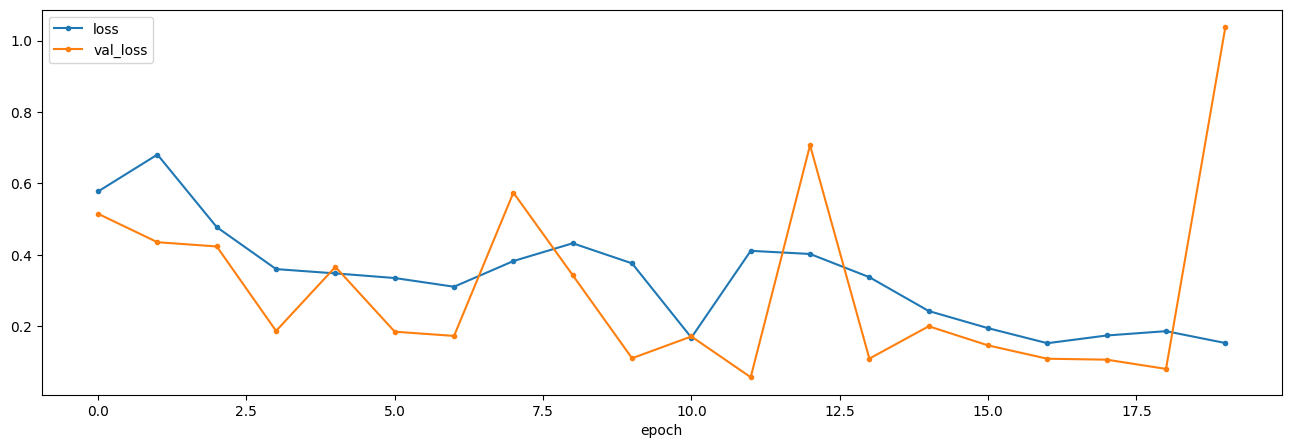

In [ ]:
print(sorted(list(history.history.keys())))
plt.figure(figsize=(16,5))
plot_history(history,['loss','val_loss']);

In [ ]:
model.export_TF(name='Noise2Void - 3D Dome 103 Processed', 
                description='This is the 3D Noise2Void trained in Dome103_processed.',
                authors=["Pau"],
                test_img=X_val[0,...], axes='ZYXC',
                patch_shape=patch_shape)

1/1 [==============================] - 1s 723ms/step
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.


d:\Python_vscode\venv_tf\Lib\site-packages\csbdeep\utils\tf.py:177: UserWarning: 
***IMPORTANT NOTE***

You are using 'tensorflow' 2.x, hence it is likely that the exported model *will not work*
in associated ImageJ/Fiji plugins (e.g. CSBDeep and StarDist).

If you indeed have problems loading the exported model in Fiji, the current workaround is
to load the trained model in a Python environment with installed 'tensorflow' 1.x and then
export it again. If you need help with this, please read:

https://gist.github.com/uschmidt83/4b747862fe307044c722d6d1009f6183

  warnings.warn(\


INFO:tensorflow:SavedModel written to: C:\Users\SPIM\AppData\Local\Temp\tmp2jtub24q\model\saved_model.pb

Model exported in BioImage ModelZoo format:
D:\Python_vscode\n2v_models\dome103_3d\export.bioimage.io.zip


https://github.com/juglab/n2v/blob/main/examples/3D/01_training.ipynb